In [14]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Import Toronto School Rating and Housing Pricing 
home_sales= pd.read_csv("toronto_api_postal_combined and filtered with price range 100K to 10M.csv")
schoolt_rating= pd.read_csv("toronto_schools.csv")
schoolt_rating.head()

,SCHOOL NAME,ADDRESS,CITY,POSTAL CODE,FSA,RANKING (OUT OF 3046),RATINGS
0,Rolph Road,31 Rolph Rd,Toronto,M4G 3M5,M4G,284,8.0
1,Burrows Hall,151 Burrows Hall Boulevard,Agincourt,M1B 1M5,M1B,947,6.9
2,Chief Dan George,185 Generation Boulevard,Scarborough,M1B 2K5,M1B,2449,4.6
3,Lucy Maud Montgomery,95 Murison Boulevard,Scarborough,M1B 2L6,M1B,2529,4.4
4,Berner Trail,120 Berner Trail,Agincourt,M1B 1B3,M1B,1246,6.5


In [16]:
# Clean Housing Pricing data frame so that pricing is average by FSA
home_sales_fsa=home_sales[["FSA","Price ($)"]]
home_sales_fsa=home_sales_fsa.groupby("FSA").mean().round()
home_sales_fsa=home_sales_fsa.drop(['L1A', 'L3T','L4C','L4J'])
home_sales_fsa.head()

,Price ($)
FSA,
M1B,516127.0
M1C,945254.0
M1E,619287.0
M1G,655781.0
M1H,497626.0


In [17]:
#Clean School Data to only have FSA & Ranking
Schoolt_fsa=schoolt_rating[["FSA","RATINGS"]]
Schoolt_fsa=Schoolt_fsa.groupby("FSA").mean()
Schoolt_fsa.head()

,RATINGS
FSA,
M1B,6.293333
M1C,7.371429
M1E,4.563636
M1G,6.057143
M1H,7.475000


In [18]:
# Combine Data Frames on FSA
combined_FSA_df = pd.merge(home_sales_fsa,Schoolt_fsa, on='FSA')
combined_FSA_df.rename(columns={'Price ($)':'Prices'}, inplace=True)
combined_FSA_df.head()

,Prices,RATINGS
FSA,,
M1B,516127.0,6.293333
M1C,945254.0,7.371429
M1E,619287.0,4.563636
M1G,655781.0,6.057143
M1H,497626.0,7.475000


In [19]:
#Create Data points for Scatterplot
x_axis= combined_FSA_df['RATINGS'].tolist()
x_axis= list(map(float, x_axis))

y_axis= combined_FSA_df['Prices'].tolist()
y_axis= list(map(float, y_axis))


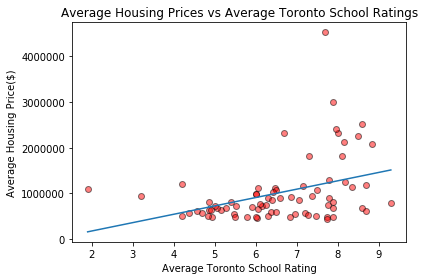

In [22]:
#Build Scatterplot graph
#fig = plt.figure() # Create matplotlib figure
plt.scatter(x_axis, y_axis, alpha=0.5,marker="o", facecolors="red", edgecolors="black",)
plt.plot(np.unique(x_axis), np.poly1d(np.polyfit(x_axis, y_axis, 1))(np.unique(x_axis)))
plt.title("Average Housing Prices vs Average Toronto School Ratings")
plt.xlabel("Average Toronto School Rating")
plt.ylabel("Average Housing Price($)")
plt.tight_layout()

In [13]:
#fig1 = plt.gcf()
#plt.show()
plt.savefig('Graphs/HPvsTS.png')

<Figure size 432x288 with 0 Axes>